<a href="https://colab.research.google.com/github/solharsh/ML_Repository_University_Of_Chicago_PGD/blob/master/Understanding_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Components Analysis (PCA)

Scikit-Learn provides many inbuilt toy datasets for running Regression and Classfication algorithms. First, we will learn how to load inbuilt datasets from Scikit-Learn datasets module.

In [0]:
from sklearn import datasets


Load the Iris dataset.

In [0]:
iris = datasets.load_iris()

Each dataset comes with four keys:
- DESCR: Dataset description
- data: Predictor columns
- target: Response column
- feature_names: Column names for predictors

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Read dataset description


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

See column names for the predictors

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

For PCA we are just concerned about the features and not the response. So, we will create a Pandas dataframe with just the features.

In [0]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


PCA is scale variant. So, we will standardize the data.

Read this explanation from SciKit-Learn on the importance of feature scaling in PCA: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

In [8]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df)
X[:5,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Let's apply PCA to get 4 Principal Components.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(X)

Preview Principal Components

In [0]:
principal_df = pd.DataFrame(data = principal_components, \
                            columns = ['principal component 1', 'principal component 2', \
                                       'principal component 3', 'principal component 4'])

In [11]:
principal_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


Get Explained Variance

In [12]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

We can see that the first principal component explains 72.77% of the variance. Whereas the last component explains 0.5% of varaince and hence can be dropped.

Generate Scree plot



In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


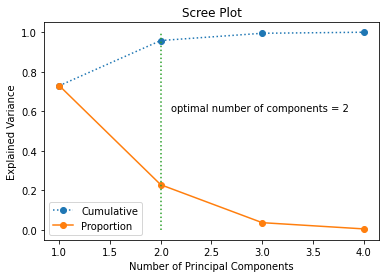

In [14]:
plt.plot(range(1,5), np.cumsum(pca.explained_variance_ratio_), linestyle=":", marker='o', label='Cumulative')
plt.plot(range(1,5), pca.explained_variance_ratio_, marker='o', label='Proportion')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot")
plt.plot([2]*10, np.linspace(0,1,10), ":")
plt.text(2.1, 0.6, "optimal number of components = 2")
plt.legend(loc='best')
plt.show()

As a rule of thumb, the selected Principal Components should be able to describe at least 80% of the variance.

So, based on our analysis, we will use the first two principal component while building a model from this dataset.